# Assignment 3



# Maxon Yin my2883





# Exercises







We will start by redoing the dataset construction of Assignment 2. ( Feel free to use your previous code!)

Start by importing pandas, numpy, maplotlib, and loading the data set.

The dataset has address

`url='https://github.com/amoreira2/Fin418/raw/refs/heads/main/assets/data/Retuns50stocks.xlsx'`

I strongly recommend you download first and look at the data set.

You should use `read_excel` to get the data that contains t0 stocks plus the market

See here:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html .

Do the followings:

1. Import this dataframe as `df`
    - Use "skip_rows" to skip the initial rows before the data.
    - Figure out what is the code for missing value and change the option `na_values` appropriately


2. Change the name of the column with the date information to "Date"

3. Use `to_datetime` so python understand the column date as a datetime object (you will have to use the option format)

4. Set date as index

5. convert the date from the start of the month to end of the month.

6. Drop any date with a missing observations (it will be just one date)

7. Find the market in the columns and save the stocks in a data frame (df) and the market in a different data frame called df_market

In [5]:
# your code below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://github.com/amoreira2/Fin418/raw/refs/heads/main/assets/data/Retuns50stocks.xlsx'

candidate_na = [-99.99, -999, -999.0, -99, 'NA', 'NaN', 'nan']

df = pd.read_excel(
    url,
    skiprows=0,
    na_values=candidate_na
)

print("Columns after initial read:", list(df.columns))

date_candidates = [c for c in df.columns if 'date' in str(c).lower()]
if len(date_candidates) == 0:
    date_col = df.columns[0]
else:
    date_col = date_candidates[0]

df = df.rename(columns={date_col: 'Date'})

try:
    df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m')
except Exception:
    df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date').sort_index()

df.index = df.index.to_period('M').to_timestamp('M')

print("Shape before dropna:", df.shape)
df = df.dropna(how='any')
print("Shape after dropna:", df.shape)

market_col = 'market'

df_market = df[[market_col]].rename(columns={market_col: 'Market'})
df = df.drop(columns=[market_col])

print("Stocks df shape:", df.shape)
print("Market df shape:", df_market.shape)
print("Index is month-end only? ->", pd.Series(df.index).dt.is_month_end.all())
print("Stocks head:\n", df.head())
print("Market head:\n", df_market.head())

Columns after initial read: ['date', 'CTL', 'T', 'CSCO', 'FCX', 'XL', 'IVZ', 'AMT', 'WHR', 'IR', 'WFT', 'YUM', 'CVS', 'GD', 'TYC', 'EL', 'MUR', 'CTAS', 'CBSA', 'SNV', 'CAM', 'DLTR', 'CAH', 'DTE', 'SSP', 'PSA', 'EXC', 'TKR', 'CMA', 'ORCL', 'MS', 'RSG', 'ACAS', 'AGN', 'MMM', 'ETFC', 'CAR', 'MDR', 'NOV', 'PCH', 'BAX', 'JCI', 'SWK', 'DVN', 'TMO', 'PEP', 'LNC', 'EMR', 'MLM', 'CCI', 'NU', 'Market']
Shape before dropna: (180, 51)
Shape after dropna: (180, 51)
Stocks df shape: (180, 50)
Market df shape: (180, 1)
Index is month-end only? -> True
Stocks head:
                 CTL        T     CSCO      FCX       XL      IVZ      AMT  \
Date                                                                        
2000-01-31 -18.4697 -11.5513   2.2170 -17.4556 -12.5301  -4.0929  17.3824   
2000-02-29 -12.9450 -11.2245  20.7192 -21.1470  -9.8898   5.3057  37.2822   
2000-03-31  10.5502  10.6732  16.9740 -12.2727  36.9397  24.4250   0.2538   
2000-04-30 -34.0067   4.6083 -10.3274 -20.2073 -13.9955   

**Exercise 1. Portfolio Moments**

Construct a portfolio that equal weights the first five stocks. Compute this portfolio variance in this sample.  



In [7]:
# your code below
stocks5 = df.iloc[:, :5].copy()

w = np.full(5, 1/5)

Sigma = stocks5.cov(ddof=1)
var_port_cov = float(w.T @ Sigma.values @ w)

print("Portfolio variance: ", var_port_cov)

Portfolio variance:  45.596248764001416


**Exercise 2. Annualize it**

Report this number in yearly units



In [8]:
monthly_var = var_port_cov
annualized_var = monthly_var * 12
print("Annualized variance: ", annualized_var)

Annualized variance:  547.154985168017


**Exercise 3. Function 1**


Construct a function that takes as input the number of stocks in the portfolio, lets call that parameter N, and outputs the (yearly) variance of the portfolio that equal weight the first N stocks

In [10]:
# your code below
def portfolio_variance(df, N):
  stocksN = df.iloc[:, :N].dropna(how='any')
  w = np.full(N, 1/N)

  Sigma = stocksN.cov(ddof=1)

  var_monthly = float(w.T @ Sigma.values @ w)

  var_annual = var_monthly * 12

  return var_annual

var5 = portfolio_variance(df, 5)
print("Annualized variance for first 5 stocks:", var5)



Annualized variance for first 5 stocks: 547.154985168017


**Exercise 4. Function 2**


Construct a function that takes as input the number of stocks in the portfolio and also, lets call that parameter N, and outputs the (yearly) variance of the portfolio that equal weight N randomly picked stocks

In [13]:
# your code below
def portfolio_variance_random(df, N, seed=None):

   selected = np.random.choice(df.columns, size=N, replace=False)
   stocksN = df[selected].dropna(how='any')

   w = np.full(N, 1/N)

   Sigma = stocksN.cov(ddof=1)

   var_monthly = float(w.T @ Sigma.values @ w)

   var_annual = var_monthly * 12

   return var_annual, list(selected)

var5, chosen5 = portfolio_variance_random(df, 5, seed=42)
print("Annualized variance (random 5 stocks):", var5)
print("Chosen stocks:", chosen5)

Annualized variance (random 5 stocks): 559.1743585028485
Chosen stocks: ['SWK', 'RSG', 'DLTR', 'ACAS', 'CBSA']


**Exercise 5. A simulation**


Construct a function that that takes as an input the number of stocks N and then use the function above (excercise 4) to simulate 100 different portfolios and output the average of these 100 portfolios

In [14]:
# your code below
def simulate_portfolio_variance(df, N, num_sim=100):
  vars_list = []

  for _ in range(num_sim):
      var_annual, _ = portfolio_variance_random(df, N)  # 调用 Exercise 4 的函数
      vars_list.append(var_annual)

  avg_var = np.mean(vars_list)

  return avg_var, vars_list

avg_var5, all_vars5 = simulate_portfolio_variance(df, 5, num_sim=100)
print("Average annualized variance (100 random 5-stock portfolios):", avg_var5)


Average annualized variance (100 random 5-stock portfolios): 584.5348901386473


**Exercise 6. A plot**


Call the function above for N=1 to N=50 and plot the variance as function of N

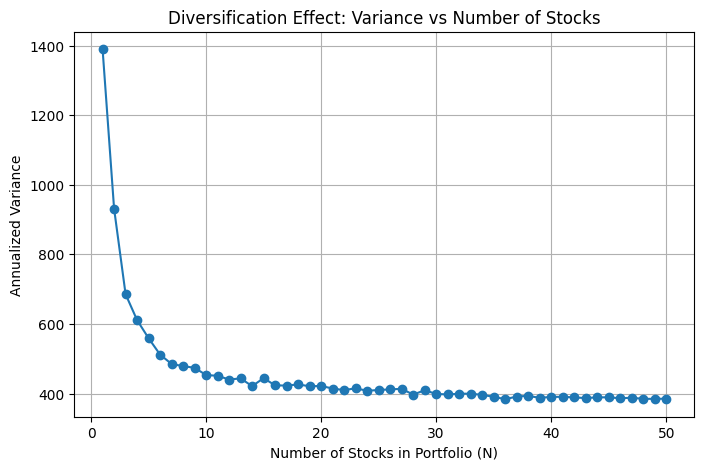

In [15]:
# your code below
N_range = range(1, 51)
avg_vars = []

for N in N_range:
    avg_var, _ = simulate_portfolio_variance(df, N, num_sim=100)
    avg_vars.append(avg_var)

plt.figure(figsize=(8,5))
plt.plot(N_range, avg_vars, marker='o')
plt.xlabel("Number of Stocks in Portfolio (N)")
plt.ylabel("Annualized Variance")
plt.title("Diversification Effect: Variance vs Number of Stocks")
plt.grid(True)
plt.show()


**Exercise 7. the market**


Add the market variance to the plot as an horizontal line to the plot you made above

In [ ]:
# your code below



**Exercise 8. Interpretation**


Explain what you see in the plot. Try to articulate what you think is happening

your answer here

**Exercise 9. A decomposition**


We now want to build a function that outputs only the terms due to the variance terms

That is, instead of computing $Var(WR)=W@Var(R)@W=\sum_i\sum_jW_iW_jCov(R_i,R_j)$ which gives you the variance of a portfolio with weight W,


I want you do compute $\sum_iW_i^2Var(R_i)$, this component of the portfolio variance that comes only from the variance terms

Then subtract this term from the total variance term


Show the three lines in a plot as functions of N (1. the total variance (and also the market like in exercise 7), 2. the component coming only from the variance terms, and 3. the residual (the component due to the covariance terms) )



In [ ]:
# your code below



**Exercise 10. Interpretation 2**


looking at this new plot, what do you learn? What does that imply about portfolio construction?


your answer here

**Exercise 11. Factor betas**

Randomly select 10 stocks from `df` and draw a figure that plots the returns of these industries along with the market return.

Just by looking, which seems seems to have the highest beta?

Why is it important to measure beta correctly? i.e. explain how you can use beta to improve a trade that you have in one of these companies

In [ ]:
# Your code below


Your answer here

**Exercise 12. Factor betas 2**

Run regressions of all stocks in `df` on the market return you saved in `df_market`. Include intercepts in the regressions.

Just follow the code below to run regressions.

The coefficients to the market return are the betas to each industry.

Now suppose you are a fund manager and you have a mandate to keep your beta equal to 0.5.

Provide portfolio weights based on the regressions above to hit the mandate beta.

Give at least *five* such portfolios that satisfy that restriction. At least one of these portfolios has to play in more than one stock at a time.

In [ ]:
import statsmodels.api as sm

X = # Put your market return here
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = # Put industry returns here (perform regressions one-by-one)
model = sm.OLS(y, X).fit(dropna=True)
print(model.summary())

# Your code below

**Exercise 13. Factor risk**

Find beta-hedged portfolio returns using the five mandate portfolios you provided in Exercise 12.

Draw a plot drawing these portfolio returns together.(i.e. spy in the x-axis, hedge portfolio in the y)

Do they show any co-movement?  Can you say they are all "risk free"? In what sense they are free of risk and what sense they are not?

In [ ]:
# Your code below

Your answer here

**Exercise 14. Alphas**

Let us assume that the risk-free rate is fixed at 0. (recall that we are working with returns here, so the intercept is not alpha, but alpha+(1-beta)(average rf))

Then, the intercepts to regression in Exercise 12 can be interpreted as alphas

Find the largest alpha stock and the lowest alpha stock from Exercise 12.

If you were trying to pick one trade, would picking up the asset with the highest alpha the best that we can do?

What other consideration might be relevant for your "best" strategy



In [ ]:
# Your code below

Your answer here

**Exercise 15. optional**

Suppose you pick the portfolio that is best according to the criteria you outline above. Is that the best that we can do? Discuss how you could further improve your portfolio